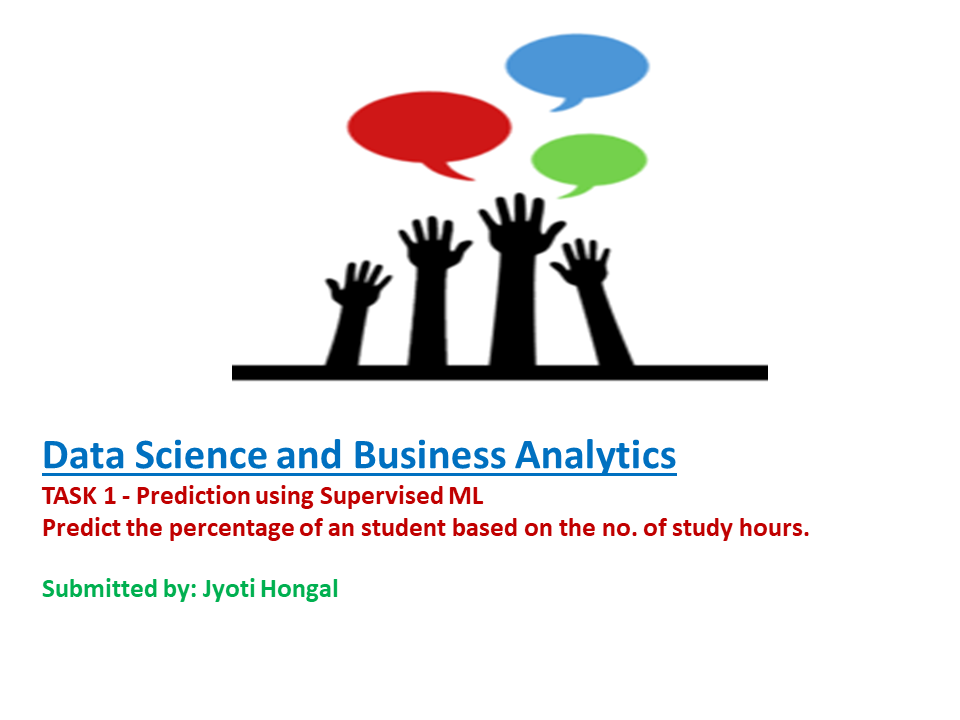

### 1) Import the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### 2) Data pre-processing

In [2]:
df1 = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print('Data representation of Students(Hours and Scores)')
df1.head(10)

Data representation of Students(Hours and Scores)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df1.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
df1.shape

(25, 2)

In [5]:
df1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Check whether null values are present or not?

In [6]:
df1.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Plotting the graph**
Since, there are two variables scatter plot is better to visualize.

<function matplotlib.pyplot.show(*args, **kw)>

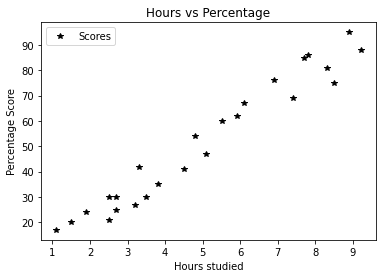

In [7]:
df1.plot(x='Hours', y='Scores', style='*', color='black')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show

Though it invloves only two variables ie, ***Hours(Independent variable(x)) and Scores(Dependent variable(y)).***
From the graph above, we can clearly see that there is a ***positive*** linear relation between the number of hours studied and percentage of score.
Therefore, we can directly apply ***linear regression*** method to predict the no. of study hours.

In [8]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, 1].values

Next step is to split the data into training and test data by using scikit-learn by importing train_test_split method.

### Splitting the dataset into test and train dataset

In [26]:
#Split the data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Training the algorithm

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred = regressor.predict(X_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


### Making the predictions

In [15]:
df2 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df2

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


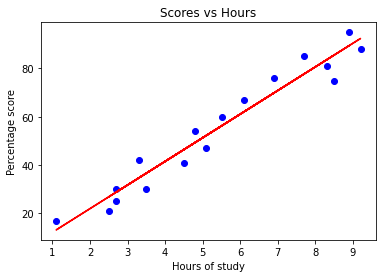

In [16]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train,regressor.predict(X_train), color='red')
plt.title('Scores vs Hours')
plt.xlabel('Hours of study')
plt.ylabel('Percentage score')
plt.show()

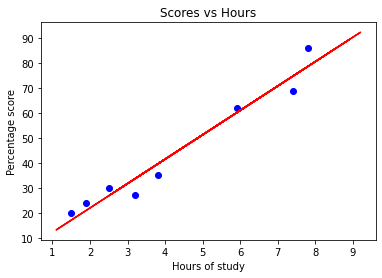

In [17]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train,regressor.predict(X_train), color='red')
plt.title('Scores vs Hours')
plt.xlabel('Hours of study')
plt.ylabel('Percentage score')
plt.show()

In [18]:
from sklearn.metrics import r2_score

In [19]:
y_prediction_train = regressor.predict(X_train)
y_prediction_test = regressor.predict(X_test)

In [20]:
r2_train = r2_score(y_train, y_prediction_train)
r2_test = r2_score(y_test, y_prediction_test)

In [21]:
print("R square for train dataset:", r2_train)
print("R square for test dataset:", r2_test)

R square for train dataset: 0.9484997422695115
R square for test dataset: 0.9568211104435257


### Predicting the score if a student studies for 9.25 hrs/day

In [24]:
hours = 9.25
print("No. of hours = {}".format(hours))
prediction = regressor.predict([[9.25]])
print("Predicted score = {}".format(prediction[0]))

No. of hours = 9.25
Predicted score = 92.91505723477056


***Predicted score when a student studies for 9.25 hrs/day is 92.9150***

### Evaluating the model by testing for its accuracy

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9568211104435257